In [2]:
import pandas
import numpy as np
import pandas as pd


#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [3]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

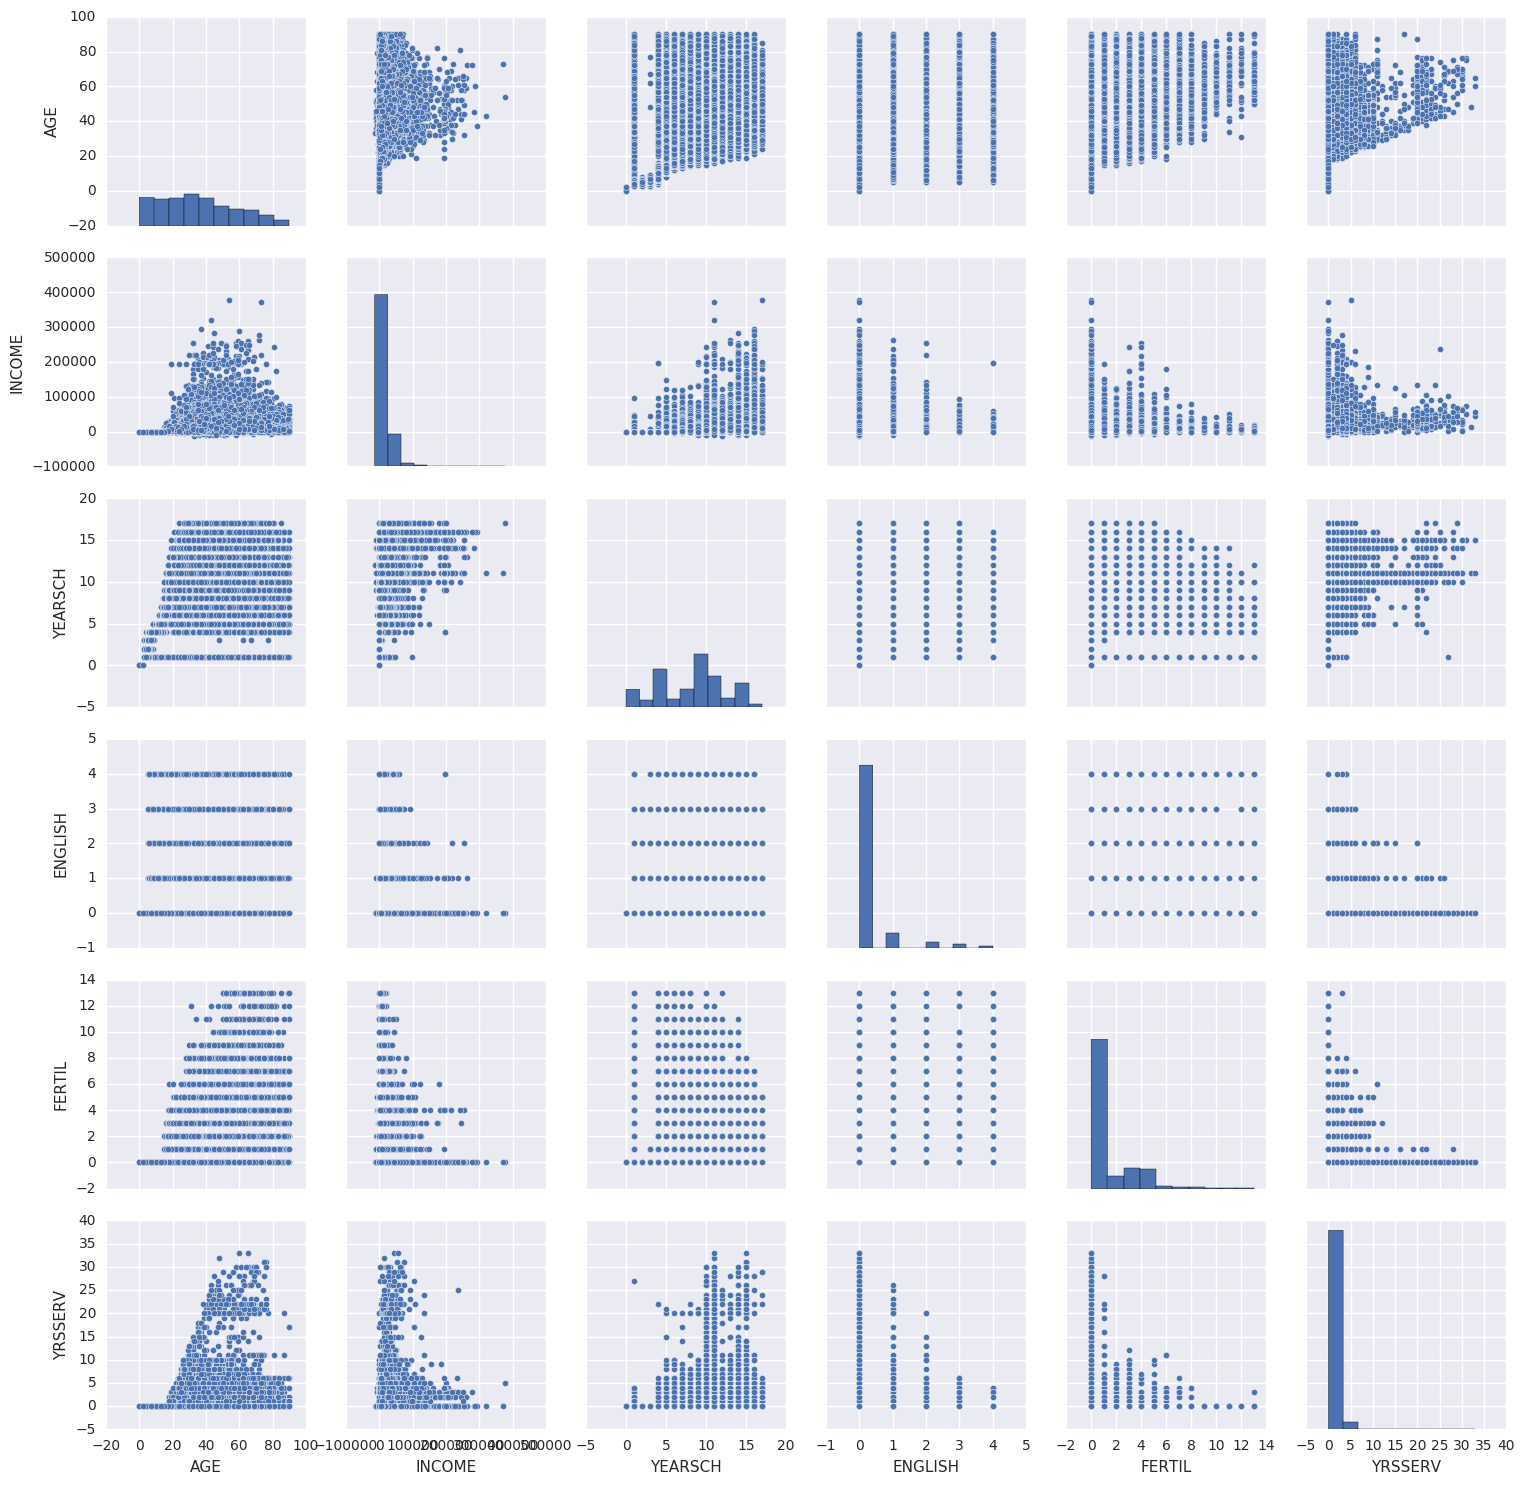

In [5]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



pairplot1 = sns.pairplot(df_demo)

pairplot1.savefig("pairplot1.png")


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.284


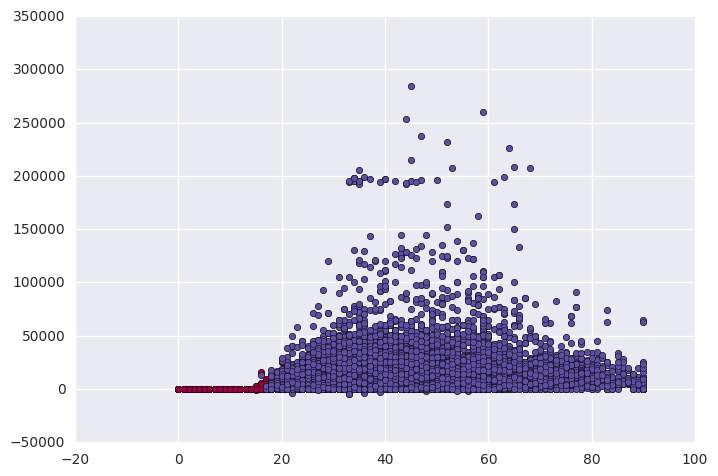

Number of clusters: 3
Silhouette Coefficient: 0.309


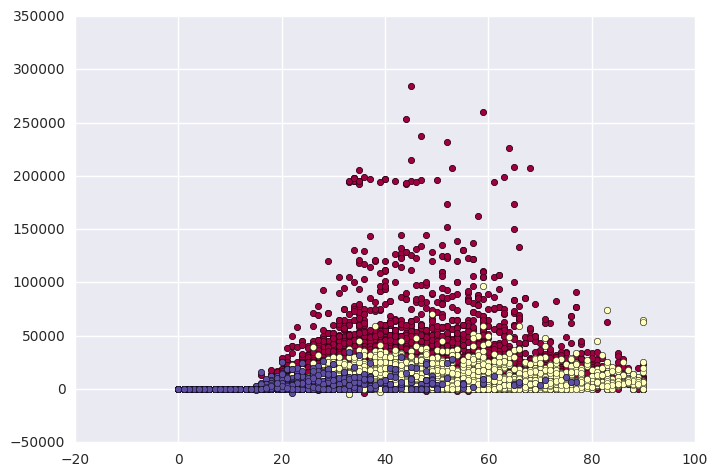

Number of clusters: 4
Silhouette Coefficient: 0.341


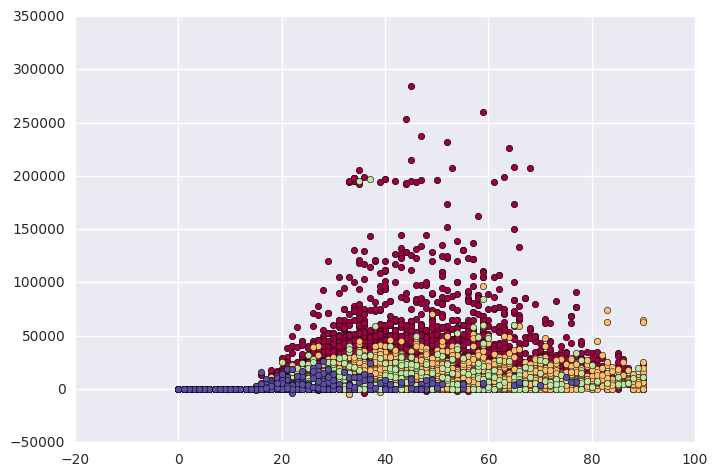

Number of clusters: 5
Silhouette Coefficient: 0.352


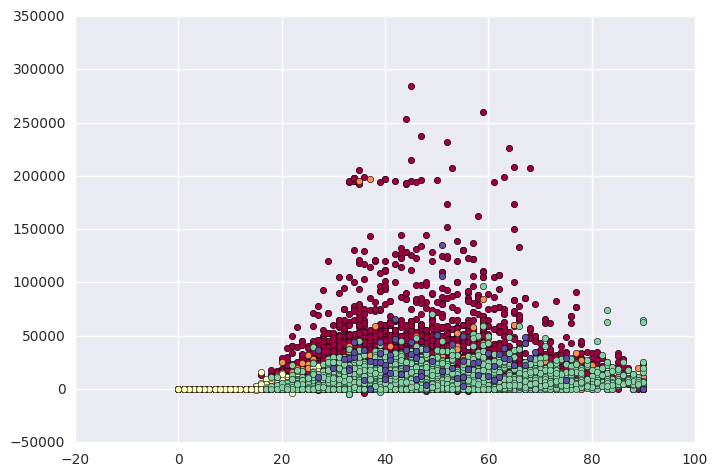

Number of clusters: 6
Silhouette Coefficient: 0.360


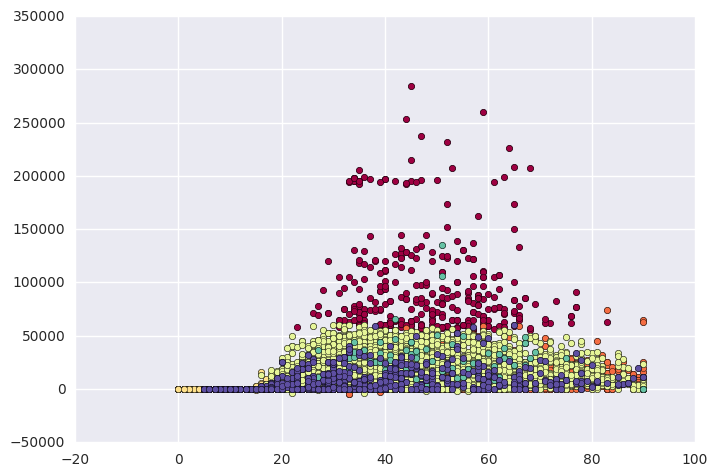

Number of clusters: 7
Silhouette Coefficient: 0.365


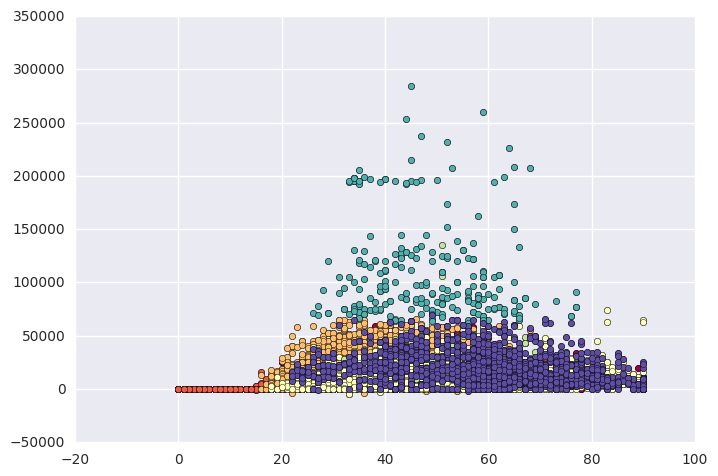

Number of clusters: 8
Silhouette Coefficient: 0.369


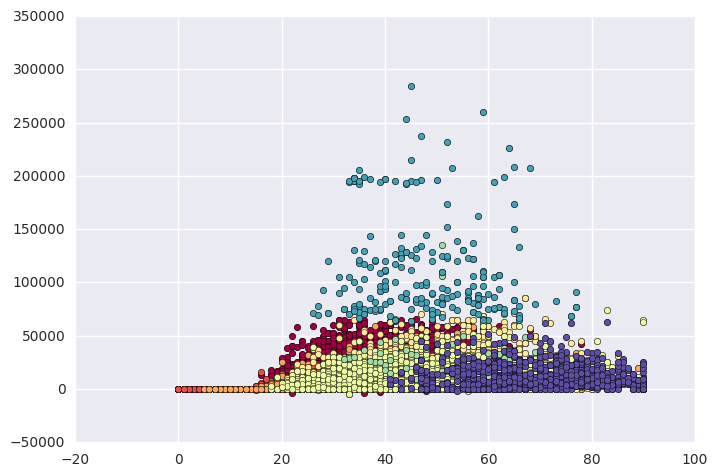

Number of clusters: 9
Silhouette Coefficient: 0.357


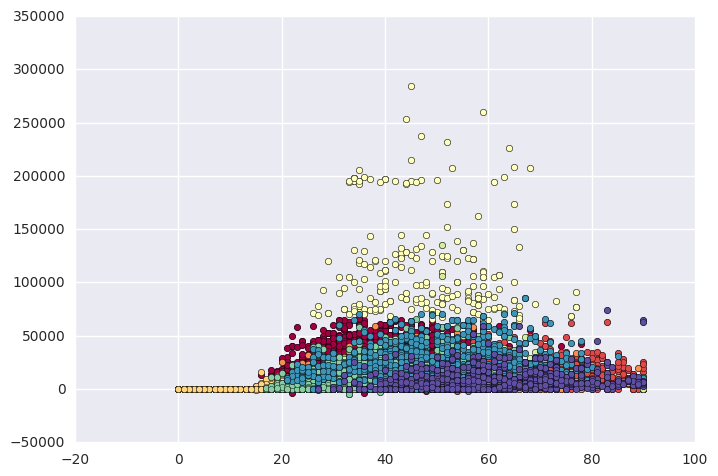

Number of clusters: 10
Silhouette Coefficient: 0.342


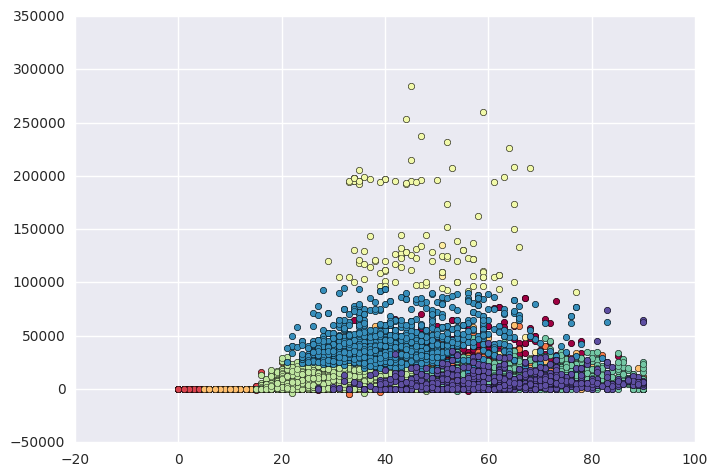

In [6]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)

for i in range (2,11):
    n_clusters = i

    labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)


    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
        
    plt.show()

Number of clusters: 2
Silhouette Coefficient: 0.289
Number of clusters: 3
Silhouette Coefficient: 0.306
Number of clusters: 4
Silhouette Coefficient: 0.339
Number of clusters: 5
Silhouette Coefficient: 0.353
Number of clusters: 6
Silhouette Coefficient: 0.355
Number of clusters: 7
Silhouette Coefficient: 0.359
Number of clusters: 8
Silhouette Coefficient: 0.371
Number of clusters: 9
Silhouette Coefficient: 0.344
Number of clusters: 10
Silhouette Coefficient: 0.343
Number of clusters: 2
Silhouette Coefficient: 0.291
Number of clusters: 3
Silhouette Coefficient: 0.312
Number of clusters: 4
Silhouette Coefficient: 0.340
Number of clusters: 5
Silhouette Coefficient: 0.353
Number of clusters: 6
Silhouette Coefficient: 0.356
Number of clusters: 7
Silhouette Coefficient: 0.356
Number of clusters: 8
Silhouette Coefficient: 0.370
Number of clusters: 9
Silhouette Coefficient: 0.345
Number of clusters: 10
Silhouette Coefficient: 0.340
Number of clusters: 2
Silhouette Coefficient: 0.281
Number of 

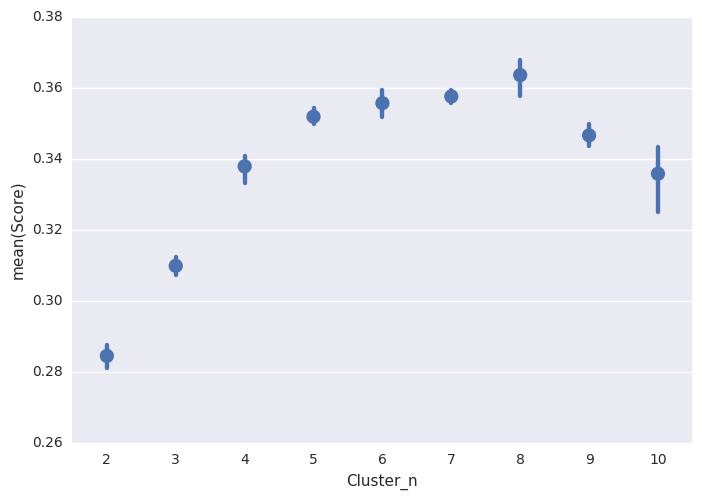

In [7]:
data = []
for i in range(0,10):
     for j in range(2,11):
        X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
        from sklearn import metrics
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_db = sc.fit_transform(X)

        n_clusters = j

        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)

        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
                  % metrics.silhouette_score(X_db, labels))
        
        s = metrics.silhouette_score(X_db, labels)
        data.append([s,j])
print data
df = pd.DataFrame(data)

df.columns = ["Score","Cluster_n"]

pointplot1 = sns.pointplot(x= "Cluster_n", y = "Score", data = df, join = False)
fig2 = pointplot1.get_figure()
fig2.savefig("pointplot")


In [7]:
from sklearn.cluster import AgglomerativeClustering
data = []
for i in range(0,10):
     for j in range(2,11):
        X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
        from sklearn import metrics
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_db = sc.fit_transform(X)

        n_clusters = j

        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)

        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
                  % metrics.silhouette_score(X_db, labels))
        
        s = metrics.silhouette_score(X_db, labels)
        data.append([s,j])
print data
df = pd.DataFrame(data)

df.columns = ["Score","Cluster_n"]



Number of clusters: 2
Silhouette Coefficient: 0.244
Number of clusters: 3
Silhouette Coefficient: 0.292
Number of clusters: 4
Silhouette Coefficient: 0.305
Number of clusters: 5
Silhouette Coefficient: 0.280
Number of clusters: 6
Silhouette Coefficient: 0.327
Number of clusters: 7
Silhouette Coefficient: 0.299
Number of clusters: 8
Silhouette Coefficient: 0.308
Number of clusters: 9
Silhouette Coefficient: 0.338
Number of clusters: 10
Silhouette Coefficient: 0.321
Number of clusters: 2
Silhouette Coefficient: 0.290
Number of clusters: 3
Silhouette Coefficient: 0.296
Number of clusters: 4
Silhouette Coefficient: 0.293
Number of clusters: 5
Silhouette Coefficient: 0.318
Number of clusters: 6
Silhouette Coefficient: 0.329
Number of clusters: 7
Silhouette Coefficient: 0.281
Number of clusters: 8
Silhouette Coefficient: 0.306
Number of clusters: 9
Silhouette Coefficient: 0.321
Number of clusters: 10
Silhouette Coefficient: 0.312
Number of clusters: 2
Silhouette Coefficient: 0.244
Number of 

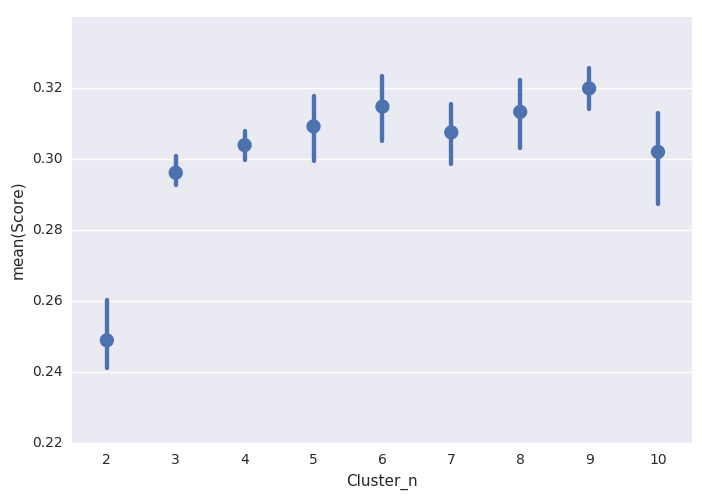

In [8]:


Agg = sns.pointplot(x= "Cluster_n", y = "Score", data = df, join = False)
fig2 = Agg.get_figure()

fig2.savefig("Agg.png")